In this notebook, we reference the baseline_test_predictions.csv (containing probabilities and truth values) to perform the following steps: 
- Apply thresholding based on F1 Score to determine correct classes (0 or 1).
- Compute performance metrics: Accuracy, Precision, Recall, F1 Score.
- Calculate False Positive Rate (FPR) for the “No Finding” label.
- Plot the FPR for the baseline models

## Initial setup

### Library Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [5]:
df = pd.read_csv("BaseLine/baseline_test_predictions.csv")
df.head()

,subject_id,study_id,Enlarged Cardiomediastinum_ground_truth,Cardiomegaly_ground_truth,Lung Opacity_ground_truth,Lung Lesion_ground_truth,Edema_ground_truth,Consolidation_ground_truth,Pneumonia_ground_truth,Atelectasis_ground_truth,...,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,10001176,tensor(53186264),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,MARRIED,WHITE,2186-11-28 21:34:00,2186-11-29 05:01:00,0
1,10001176,tensor(54684191),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,MARRIED,WHITE,2186-11-28 21:34:00,2186-11-29 05:01:00,0
2,10001176,tensor(54684191),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,MARRIED,WHITE,2186-11-28 21:34:00,2186-11-29 05:01:00,0
3,10001217,tensor(52067803),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,?,MARRIED,WHITE,2157-11-18 17:38:00,2157-11-19 01:24:00,0
4,10001217,tensor(58913004),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,?,MARRIED,WHITE,2157-11-18 17:38:00,2157-11-19 01:24:00,0


In [6]:
# list of all column labels from dataset
labels = ["Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema", "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices", "No Finding"]


In [7]:

def get_label_data(df, label):
    y_true = df[f"{label}_ground_truth"]                            # adding "groud_truth" suffix
    y_prob = df[f"{label}_probability"]                             # adding "probability" suffix
    return y_true, y_prob

def find_best_threshold( y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)                            # test 100 thresholds between 0.0. and 1.0
    best_threshold = 0
    best_f1 = 0
    f1_scores = []

    for threshold in thresholds:                                    # threshold used to get the predictions later ( if anything >= threshold, prediction = 1, else 0)
        y_pred = []
        for prob in y_prob:
            # convert probabilities to binary predictions
            if prob >= threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
        # f1 score for current threshold
        f1 = f1_score(y_true, y_pred, zero_division = 0)
        f1_scores.append(f1)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# process all labels to find the best one for each
def process_all_labels(df, labels):
    results = {}
    for label in labels:
        print(f"Processing Label: {label}")
        y_true, y_prob = get_label_data(df, label)                                              # get ground truth and predicted probabilites for the label
        
        print("Truth Sample:", y_true.head().tolist())
        print("Prob Sampe: ", y_prob.head().tolist())

        best_threshold, best_f1 = find_best_threshold(y_true, y_prob)                           # find best threshold and f1 score
        results[label] = {"best_threshold": best_threshold, "best_f1": best_f1}
    
        print("\n----------")
        print(f"Best Threshold For Label '{label}' Based On F1 Score: {best_threshold}")
        print(f"Best F1 Score Overall: {best_f1}")

    return results 

results = process_all_labels(df, labels)

Processing Label: Enlarged Cardiomediastinum
Truth Sample: [0.0, 0.0, 0.0, 0.0, 0.0]
Prob Sampe:  [0.011228524, 0.03717068, 0.049578283, 0.013247089, 0.01966936]

----------
Best Threshold For Label 'Enlarged Cardiomediastinum' Based On F1 Score: 0.06060606060606061
Best F1 Score Overall: 0.1409507923269391
Processing Label: Cardiomegaly
Truth Sample: [0.0, 0.0, 0.0, 0.0, 1.0]
Prob Sampe:  [0.107249245, 0.39783964, 0.48069987, 0.03568032, 0.10560523]

----------
Best Threshold For Label 'Cardiomegaly' Based On F1 Score: 0.29292929292929293
Best F1 Score Overall: 0.5196994991652755
Processing Label: Lung Opacity
Truth Sample: [1.0, 0.0, 0.0, 0.0, 0.0]
Prob Sampe:  [0.0688593, 0.2894648, 0.28179815, 0.06424006, 0.054042153]

----------
Best Threshold For Label 'Lung Opacity' Based On F1 Score: 0.22222222222222224
Best F1 Score Overall: 0.511590610876221
Processing Label: Lung Lesion
Truth Sample: [0.0, 0.0, 0.0, 0.0, 0.0]
Prob Sampe:  [0.007917892, 0.018727511, 0.027182437, 0.030550435, 

### Generate Predictions and Evaluate

Computes standard classification metrics based on given/passed in threshold

In [8]:
def evaluate_metrics(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)                                      # convert probabilites into binary 
    
    return{"Accuracy: ": accuracy_score(y_true, y_pred), "Precision: ": precision_score(y_true, y_pred, zero_division = 0), "Recall: ": recall_score(y_true, y_pred, zero_division = 0), "F1 Score: ": f1_score(y_true, y_pred, zero_division = 0)}


y_true, y_prob = get_label_data(df, "No Finding")                                   # exract ground truth and probability values for 'No Finding' label
best_threshold, best_f1 = find_best_threshold(y_true, y_prob)                       # find best threshold for it
metrics = evaluate_metrics(y_true, y_prob, best_threshold)                          # evaluate metrics at the best threshold
y_pred = (y_prob >= best_threshold).astype(int)                                     # generate binary predictions - used later for FPR and plotting

print("\n---------- METRICS -------------")
for metric, value in metrics.items():
    print(f"{metric.capitalize()}: {value}")
print("--------------------------------")


---------- METRICS -------------
Accuracy: : 0.8036218794868232
Precision: : 0.6589730930634411
Recall: : 0.7833039906103286
F1 score: : 0.7157795951199892
--------------------------------


### Calculate FPR for 'No Finding' Label

Calculate FPR for previously defined label

In [9]:
def calculate_fpr(y_true, y_pred):
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_pred).ravel()
    if(false_positive + true_negative) > 0:
        false_positive_rate = false_positive / (false_positive + true_negative)  
    else: false_positive_rate = 0
    
    print(f"False Positive Rate (FPR) for 'No Finding' Label: ", false_positive_rate)
    return false_positive_rate

fpr = calculate_fpr(y_true, y_pred)

False Positive Rate (FPR) for 'No Finding' Label:  0.187005076142132


### Plotting FPR Across Demographics


--- Group: F ---
Total in group: 9678
True class distribution: {0.0: 6329, 1.0: 3349}
Predicted class distribution: {0: 5626, 1: 4052}
Best threshold for 'No Finding': 0.313
False Positive Rate (FPR) for 'No Finding' Label:  0.20603570864275558
Stored FPR for gorup F:0.20603570864275558

--- Group: M ---
Total in group: 11913
True class distribution: {0.0: 8446, 1.0: 3467}
Predicted class distribution: {0: 7863, 1: 4050}
Best threshold for 'No Finding': 0.313
False Positive Rate (FPR) for 'No Finding' Label:  0.17274449443523562
Stored FPR for gorup M:0.17274449443523562
Returned FPRs: {'F': 0.20603570864275558, 'M': 0.17274449443523562}

Filtered:  <class 'dict'> {'F': 0.20603570864275558, 'M': 0.17274449443523562}
Raw FPRs: {'F': 0.20603570864275558, 'M': 0.17274449443523562}
Filtered: {'F': 0.20603570864275558, 'M': 0.17274449443523562}


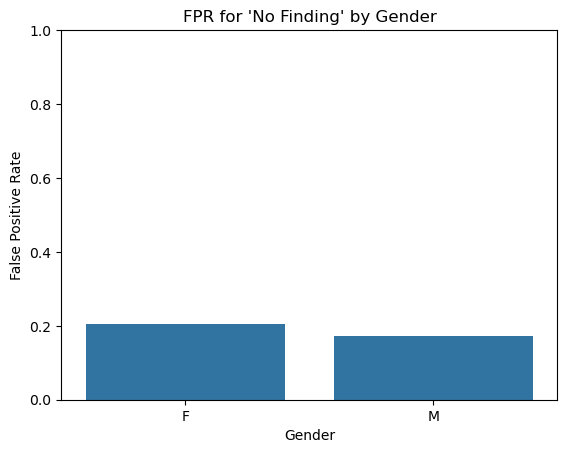

In [10]:
def calculate_fpr_by_grouped(df, label, group_column):
    fprs = {}
    y_true, y_prob = get_label_data(df, label)                                                  # extract ground truth and predictions for the label 
    best_threshold, _ = find_best_threshold(y_true, y_prob)                                     # find best threshold for converting probabilities to binary 
    y_pred = (y_prob >= best_threshold).astype(int)

    # temporary df for predictions and ground truth
    temp_df = df.copy()
    temp_df["true_class"] = y_true
    temp_df["pred_class"] = y_pred

    for group in temp_df[group_column].dropna().unique():                                       # loop through each unique group value e.g M and F in Gender
        group_subset = temp_df[temp_df[group_column] == group]
        
        print(f"\n--- Group: {group} ---")
        print("Total in group:", len(group_subset))
        print("True class distribution:", group_subset["true_class"].value_counts().to_dict())
        print("Predicted class distribution:", group_subset["pred_class"].value_counts().to_dict())
        print(f"Best threshold for '{label}': {best_threshold:.3f}")

        if group_subset["pred_class"].nunique() < 2 or group_subset["true_class"].nunique() < 2:        # check if there is enough varying data 
            print(f"Skipping group {group} since theres not enough varying data")
            fpr[group] = None   
        else:
            fpr = calculate_fpr(group_subset["true_class"], group_subset["pred_class"])                 # calculate FPR 
            fprs[group]= fpr
            print(f"Stored FPR for gorup {group}:{fprs[group]}")
    print(f"Returned FPRs:", fprs)
    return fprs

# specify label and group column
label = "No Finding"
group_column = "gender"

# calls the group-based FPR 
fprs_by_gender = calculate_fpr_by_grouped(df, label, group_column)

# filter any Noneo or NaN values
filtered_fprs = {}
for key, value in fprs_by_gender.items():
    if value is not None and not np.isnan(value):
        filtered_fprs[key] = value

print("\nFiltered: ", type(filtered_fprs), filtered_fprs)
print("Raw FPRs:", fprs_by_gender)
print("Filtered:", filtered_fprs)

# --- Plotting ---
# only if there are valid entries
if filtered_fprs:
    sns.barplot(x = list(filtered_fprs.keys()), y = list(filtered_fprs.values()))
    plt.title(f"FPR for '{label}' by {group_column.capitalize()}")
    plt.ylabel("False Positive Rate")
    plt.xlabel(group_column.capitalize())
    # plt.legend()
    plt.ylim(0, 1)
    plt.show()
else:
    print("No valid FPR To Plot!")

In [11]:
print(fprs_by_gender)

{'F': 0.20603570864275558, 'M': 0.17274449443523562}


In [12]:
print(df["No Finding_ground_truth"].value_counts())
print(df["No Finding_probability"].describe())

No Finding_ground_truth
0.0    14775
1.0     6816
Name: count, dtype: int64
count    21591.000000
mean         0.303539
std          0.271549
min          0.011883
25%          0.079605
50%          0.179034
75%          0.503628
max          0.949378
Name: No Finding_probability, dtype: float64


## Calculate TPR gaps for the sensitive attributes (gender, race, insurance)

In [13]:
def calculate_tpr(y_true, y_pred):
    
    #Calculate True Positive Rate (TPR) for a given set of true labels and predictions.
    
    true_positive, false_negative = confusion_matrix(y_true, y_pred).ravel()[-2:]
    if (true_positive + false_negative) > 0:
        tpr = true_positive / (true_positive + false_negative)
    else:
        tpr = 0
    return tpr

def calculate_tpr_by_grouped(df, label, group_column):
    
    #Calculate TPR 
    
    tprs = {}
    y_true, y_prob = get_label_data(df, label)  # Extract ground truth and probabilities for the label
    best_threshold, _ = find_best_threshold(y_true, y_prob)  # Find the best threshold
    y_pred = (y_prob >= best_threshold).astype(int)  # Generate binary predictions

    # Create a temporary DataFrame for group-based analysis
    temp_df = df.copy()
    temp_df["true_class"] = y_true
    temp_df["pred_class"] = y_pred

    for group in temp_df[group_column].dropna().unique():  # Loop through each unique group
        group_subset = temp_df[temp_df[group_column] == group]
        print(f"\n--- Group: {group} ---")
        print("Total in group:", len(group_subset))
        print("True class distribution:", group_subset["true_class"].value_counts().to_dict())
        print("Predicted class distribution:", group_subset["pred_class"].value_counts().to_dict())
        print(f"Best threshold for '{label}': {best_threshold:.3f}")

        if group_subset["pred_class"].nunique() < 2 or group_subset["true_class"].nunique() < 2:
            print(f"Skipping group {group} since there's not enough varying data")
            tprs[group] = None
        else:
            tpr = calculate_tpr(group_subset["true_class"], group_subset["pred_class"])
            tprs[group] = tpr
            print(f"Stored TPR for group {group}: {tprs[group]}")

    print(f"Returned TPRs: {tprs}")
    return tprs

def calculate_tpr_gap(tprs):

    #Calculate the TPR gap (difference between max and min TPR) for a given set of TPRs.
    
    valid_tprs = [tpr for tpr in tprs.values() if tpr is not None]
    if valid_tprs:
        tpr_gap = max(valid_tprs) - min(valid_tprs)
    else:
        tpr_gap = None
    return tpr_gap

# Specify the label and demographic columns
label = "No Finding"

# Calculate TPR by gender
tprs_by_gender = calculate_tpr_by_grouped(df, label, "gender")
tpr_gap_gender = calculate_tpr_gap(tprs_by_gender)
print(f"\nTPR Gap for Gender: {tpr_gap_gender}")

# Calculate TPR by insurance
tprs_by_insurance = calculate_tpr_by_grouped(df, label, "insurance")
tpr_gap_insurance = calculate_tpr_gap(tprs_by_insurance)
print(f"\nTPR Gap for Insurance: {tpr_gap_insurance}")

# Calculate TPR by race
tprs_by_race = calculate_tpr_by_grouped(df, label, "ethnicity")
tpr_gap_race = calculate_tpr_gap(tprs_by_race)
print(f"\nTPR Gap for Race: {tpr_gap_race}")


--- Group: F ---
Total in group: 9678
True class distribution: {0.0: 6329, 1.0: 3349}
Predicted class distribution: {0: 5626, 1: 4052}
Best threshold for 'No Finding': 0.313
Stored TPR for group F: 0.17945655419528217

--- Group: M ---
Total in group: 11913
True class distribution: {0.0: 8446, 1.0: 3467}
Predicted class distribution: {0: 7863, 1: 4050}
Best threshold for 'No Finding': 0.313
Stored TPR for group M: 0.2526680126910874
Returned TPRs: {'F': 0.17945655419528217, 'M': 0.2526680126910874}

TPR Gap for Gender: 0.07321145849580524

--- Group: Medicare ---
Total in group: 10528
True class distribution: {0.0: 7755, 1.0: 2773}
Predicted class distribution: {0: 7217, 1: 3311}
Best threshold for 'No Finding': 0.313
Stored TPR for group Medicare: 0.27948070681572307

--- Group: Other ---
Total in group: 9416
True class distribution: {0.0: 5960, 1.0: 3456}
Predicted class distribution: {0: 5302, 1: 4114}
Best threshold for 'No Finding': 0.313
Stored TPR for group Other: 0.17216435185

## Plot the TPR gap results

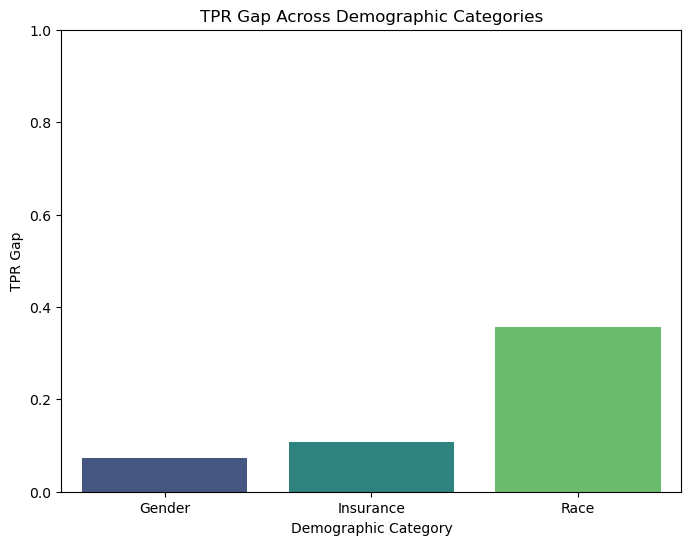

In [14]:
def plot_tpr_gaps(tpr_gaps, demographic_categories):
    """
    Plot TPR gaps for different demographic categories.

    Parameters:
    - tpr_gaps: Dictionary containing TPR gaps for each demographic category.
    - demographic_categories: List of demographic categories (e.g., gender, insurance, race).
    """
    # Convert the TPR gaps into a DataFrame
    tpr_gap_df = pd.DataFrame({
        "Demographic Category": demographic_categories,
        "TPR Gap": [tpr_gaps[category] for category in demographic_categories]
    })

    # Plot the TPR gaps
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x="Demographic Category",
        y="TPR Gap",
        hue="Demographic Category",  
        data=tpr_gap_df,
        palette="viridis",
        dodge=False,  
        legend=False  
    )
    plt.title("TPR Gap Across Demographic Categories")
    plt.ylabel("TPR Gap")
    plt.xlabel("Demographic Category")
    plt.ylim(0, 1)  # TPR gaps are between 0 and 1
    plt.show()


# Store the TPR gaps in a dict
tpr_gaps = {
    "Gender": tpr_gap_gender,
    "Insurance": tpr_gap_insurance,
    "Race": tpr_gap_race
}

# Plot the TPR gaps
plot_tpr_gaps(tpr_gaps, ["Gender", "Insurance", "Race"])

## AUC Per Label and Overall (Before and After)


### Goal: Report AUC for each of the 14 labels and an average AUC across all labels for both Baseline and Debiased Predictions

In [25]:
#BEFORE
def find_all_aucs_baseline(df):
    """
    Calculate and record AUC for each label using baseline_test_predictions.csv.
    Compute the average AUC across all labels.

    Parameters:
        df: input datafram 
        labels: holds the label names from the df
    """
    aucs_baseline = {}
    print(f"----Area Under Curve for All Labels in Baseline Predictions----")
    for label in labels:
        y_true, y_prob = get_label_data(df, label)
    
        try:
            auc_baseline = roc_auc_score(y_true, y_prob)
            print(f"AUC for {label}: {auc_baseline}")
        except ValueError:
            print(f"Warning: Only one class in y_true {label}, cant calculate AUC")
            auc_baseline = None
        
        aucs_baseline[label] = auc_baseline

    return aucs_baseline
       
aucs_baseline = find_all_aucs_baseline(df)
mean_auc = np.mean([value for value in aucs_baseline.values() if value is not None])
print(f"\nAverage AUC for all labels: {mean_auc}")


----Area Under Curve for All Labels in Baseline Predictions----
AUC for Enlarged Cardiomediastinum: 0.7121739530887361
AUC for Cardiomegaly: 0.8026875857944425
AUC for Lung Opacity: 0.7680117389737212
AUC for Lung Lesion: 0.7875807064156755
AUC for Edema: 0.892258706836114
AUC for Consolidation: 0.8254991266096144
AUC for Pneumonia: 0.73795017242151
AUC for Atelectasis: 0.8064520945898295
AUC for Pneumothorax: 0.8742500656458692
AUC for Pleural Effusion: 0.9074102885324271
AUC for Pleural Other: 0.8535141143755465
AUC for Fracture: 0.7510334155932521
AUC for Support Devices: 0.928507624603063
AUC for No Finding: 0.8667067932127452

Average AUC for all labels: 0.8224311704780389


In [26]:
#AFTER
df_debiased = pd.read_csv("Debiased/debiased_test_predictions_3committe_TestOne.csv")

def find_all_aucs_debiased(df_debiased):
    
    aucs_debiased = {}
    print(f"----Area Under Curve for All Labels in Debiased Predictions (3committe_TestOne)----")
    for label in labels:
        y_true, y_prob = get_label_data(df_debiased, label)
    
        try:
            auc_debias = roc_auc_score(y_true, y_prob)
            print(f"AUC for {label}: {auc_debias}")
        except ValueError:
            print(f"Warning: Only one class in y_true {label}, cant calculate AUC")
            auc_debias = None
        
        aucs_debiased[label] = auc_debias

    return aucs_debiased
       
aucs_debiased_ = find_all_aucs_debiased(df_debiased)
mean_auc = np.mean([value for value in aucs_debiased.values() if value is not None])
print(f"\nAverage AUC for all labels: {mean_auc}")

    

----Area Under Curve for All Labels in Debiased Predictions (3committe_TestOne)----
AUC for Enlarged Cardiomediastinum: 0.7275810752585066
AUC for Cardiomegaly: 0.8045831678442921
AUC for Lung Opacity: 0.7706878338443413
AUC for Lung Lesion: 0.8040036613952951
AUC for Edema: 0.8917596968013234
AUC for Consolidation: 0.8281701954268115
AUC for Pneumonia: 0.7457762453422012
AUC for Atelectasis: 0.8099298541200576
AUC for Pneumothorax: 0.885758445505818
AUC for Pleural Effusion: 0.9095331779324886
AUC for Pleural Other: 0.8753261262541415
AUC for Fracture: 0.7949488156330218
AUC for Support Devices: 0.9289270107320489
AUC for No Finding: 0.8677277511657651

Average AUC for all labels: 0.8323717009865367


In [29]:
#AFTER
df_debiased_2 = pd.read_csv("Debiased/test_predictions_committee20.csv")
def find_all_aucs_debiased_2(df_debiased_2):
    
    aucs_debiased = {}
    print(f"----Area Under Curve for All Labels in Debiased Predictions (committee20)----")
    for label in labels:
        y_true, y_prob = get_label_data(df_debiased_2, label)
    
        try:
            auc_debias = roc_auc_score(y_true, y_prob)
            print(f"AUC for {label}: {auc_debias}")
        except ValueError:
            print(f"Warning: Only one class in y_true {label}, cant calculate AUC")
            auc_debias = None
        
        aucs_debiased[label] = auc_debias

    return aucs_debiased
       
aucs_debiased = find_all_aucs_debiased_2(df_debiased_2)
mean_auc = np.mean([value for value in aucs_debiased.values() if value is not None])
print(f"\nAverage AUC for all labels: {mean_auc}")

----Area Under Curve for All Labels in Debiased Predictions (committee20)----
AUC for Enlarged Cardiomediastinum: 0.7297126226135734
AUC for Cardiomegaly: 0.8049012350460819
AUC for Lung Opacity: 0.7709385088528048
AUC for Lung Lesion: 0.8050816536007559
AUC for Edema: 0.8926104007331068
AUC for Consolidation: 0.8275370535450123
AUC for Pneumonia: 0.7436971648841461
AUC for Atelectasis: 0.80933482166852
AUC for Pneumothorax: 0.88544684306734
AUC for Pleural Effusion: 0.9102330283137985
AUC for Pleural Other: 0.8739088654178913
AUC for Fracture: 0.802449941765749
AUC for Support Devices: 0.9293407385528691
AUC for No Finding: 0.8680109357498629

Average AUC for all labels: 0.8323717009865367


### Comparison:
- Create a comparison table: baseline vs. debiased per-label AUCs.
- Include the difference and whether it improved.
- Include the average AUC across all labels in both models.

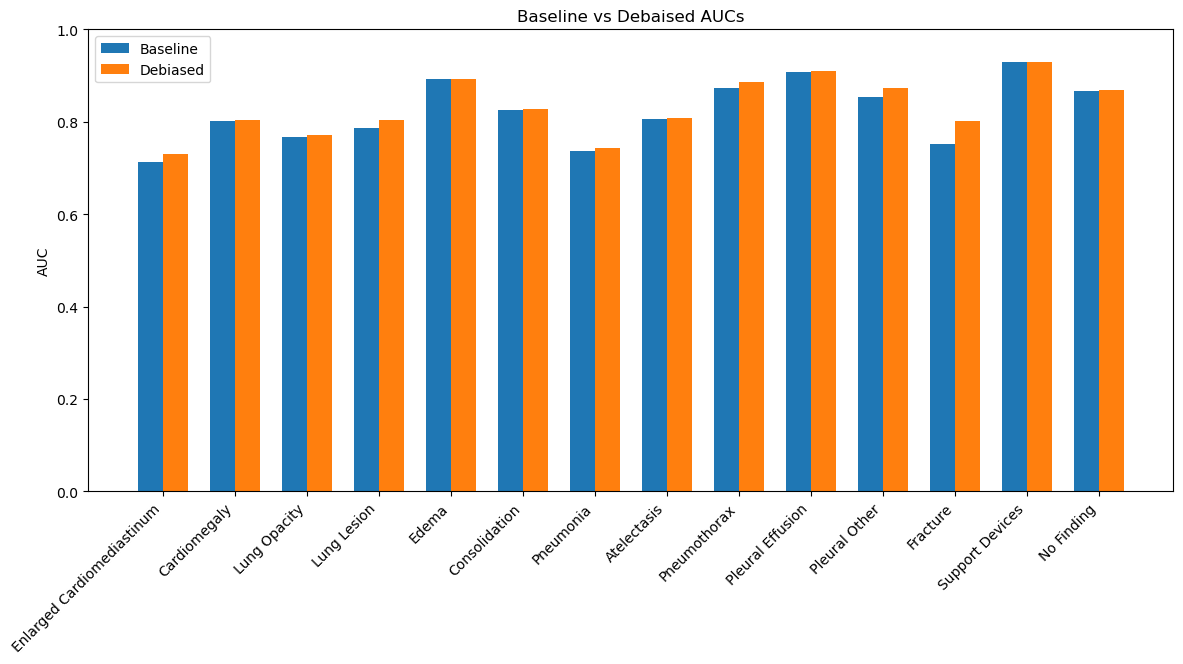

In [ ]:
def auc_baseline_debiased_comparison_plot(baseline_dict, debiased_dict, title = "Baseline vs Debaised AUCs"):
    labels = []
    
    for label in baseline_dict:
        if baseline_dict[label] is not None and debiased_dict.get(label) is not None:
            labels.append(label)
    
    
    baseline_aucs = [baseline_dict[label] for label in labels]
    debiased_aucs = [debiased_dict[label] for label  in labels]


    # -- plotting --
    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(14,6))
    plt.bar(x-width/2, baseline_aucs, width, label='Baseline')
    plt.bar(x+width/2, debiased_aucs, width, label='Debiased')

    plt.xticks(x, labels, rotation=45, ha='right')
    plt.ylim(0,1)
    plt.title(title)
    plt.ylabel("AUC")
    plt.legend()
    plt.tight_layout
    plt.show()

auc_baseline_debiased_comparison_plot(aucs_baseline, aucs_debiased)